# Instructions

- Please convert the notebook into pdf for final submission. If you have issue with directly downloading the file as pdf, you can use web browers's print >> save as pdf.
- If you use languages other than Python, you have to submit your executable code together with a report that contains all the results needed.

# Triangle counting

A triangle is a graph structure with three-node all connecting to each other. Finding triangles in real world networks is important due to the homogenous meaning it carries. For example, in a facebook network where nodes represent users and edges represent "friend" relations, users connected by triangle structures are more likely to know each other in real life. However, counting triangles can be a computation-heavy task on large graphs, i.e., the best known deterministic algorithm has a complexity of $O(m^{3/2})$. In this homework, we will study a randomized approach that significantly accerlerate the computation, proposed in [1].

[1]. Charalampos E. Tsourakakis, U. Kang, Gary L. Miller, and Christos Faloutsos. 2009. DOULION: counting triangles in massive graphs with a coin. In Proceedings of the 15th ACM SIGKDD international conference on Knowledge discovery and data mining (KDD '09). Association for Computing Machinery, New York, NY, USA, 837–846. https://doi.org/10.1145/1557019.1557111



## Preliminaries



### Networkx

Networkx is a Python library people commonly use when dealing with graphs. Please follow the instructions to install the package: https://networkx.org/documentation/stable/install.html. A tutorial for quick-start is also available on their webpage: https://networkx.org/documentation/stable/tutorial.html.

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import random, time
import matplotlib.pyplot as plt

### G(n, p)

$G(n, p)$ is a simple random graph model of the Erdős-Rényi graphs. It generates graphs with $n$ nodes by independently sample the existance of each possible edge by probability $p$. Networkx provides a convenient way to generate random graphs using built-in functions for various commonly used graph models. To create an Erdős-Rényi graph, we can use the function nx.erdos_renyi_graph(n, p), where n is the number of nodes and p is the probability of an edge between two nodes. The function returns an nx.Graph object containing the nodes and edges of the generated graph.

the sampled graph contains 10 nodes and 12 edges


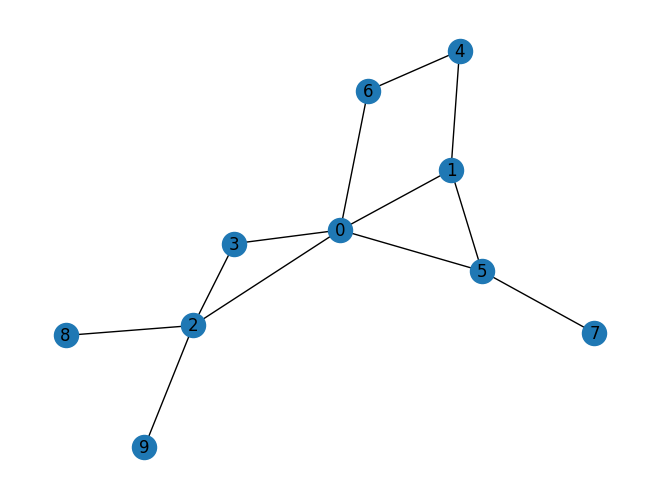

In [4]:
# Example: generate a graph from G(10, 0.3)
G_test = nx.erdos_renyi_graph(10, 0.4)
# Check how many nodes and edges it has.
print("the sampled graph contains", G_test.number_of_nodes(), "nodes and", G_test.number_of_edges(), "edges")
# Plot the graph
nx.draw(G_test, with_labels=True)

### Triangle counting in Networkx

Networkx also provides a function for triangle counting called nx.triangles(G). It takes a nx.Graph object $G$ as input and returns a dictionary of (node id, number of triangles participated) key-value pairs. To calculate the total number of triangles in G, simply sum all the values in the dictionary and divide the result by 3 (since each triangle is counted three times in the dictionary).

In [5]:
node_triangle_dict = nx.triangles(G_test)
print("Total number of triangles in the test graph:", sum([node_triangle_dict[i] for i in node_triangle_dict])/3)
print("The triangle participation for each node: ", node_triangle_dict)

Total number of triangles in the test graph: 2.0
The triangle participation for each node:  {0: 2, 1: 1, 2: 1, 3: 1, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0, 9: 0}


## Doulion: a randomized algorithm for triangle counting

### Algorithm

The algorithm works as follows. Given a graph $G$ and a biased coin that shows head with probability $q$, we toss the coin for each edge, keep the edge if we get a head, and delete it otherwise. Count the number of triangles on the new graph $G'$ and multiple by $1/q^3$.

### Problem 1.

Assume the number of triangles in $G$ is $T$, and $T'$ is a random variable that represents the number of triangles in the new graph $G'$. Prove expected value of $T'$ is $q^3\cdot T$.


Proof: \
For a single triangle to form, all three edges will need to be kept during the process. With each edge being kept with the probability of q, the probability of the triangle is in $G'$ is $q^3$. According to the definition of expectation, 
$$
E(T') = q^3\cdot T
$$
$Q.E.D.$


### Problem 2.

Implement the algorithm in the cell below

In [21]:
def doulion(G, q):
    '''
    G: nx.Graph.
    q: float, the probability of getting a head in the coin tosses of doulion.

    Return: int, the estimated number of triangles in G.
    '''
    for (u,v) in list(G.edges):
        if random.random() > q:
            G.remove_edge(u,v)
    node_triangle_dict = nx.triangles(G)
    return sum([node_triangle_dict[i] for i in node_triangle_dict])/3


### Problem 3

Now we will test the function on $G(n,p)$ with q values range in $[0.1,0.2,0.4,0.8]$. Since both the graph and the algorithm are randomized, for each $q$ value, you are asked to repeat the following steps 10 times and report the average values of metrics.

1. Sample a graph from $G(n,p)$ with $n=1000$ and $p=0.05$.

2. Count the real number of triangles $T$ in the sampled graph.

3. Run doulion to get an estimated number of triangles $T'$.

4. Return the following metrics: running time for both algorithms, and the accuracy of doulion. The accuracy here is defined as $1-{|T-T'|\over T}$.

Plot the average values with standard deviation as error bars for different q values. You are asked to generate two plots with the q values being the x axis. The first one should show the change of running times for both methods v.s. q value, and the second one should show the change of accuracy for doulion.

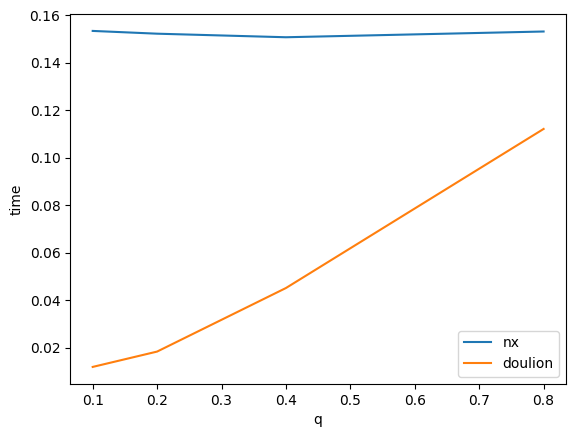

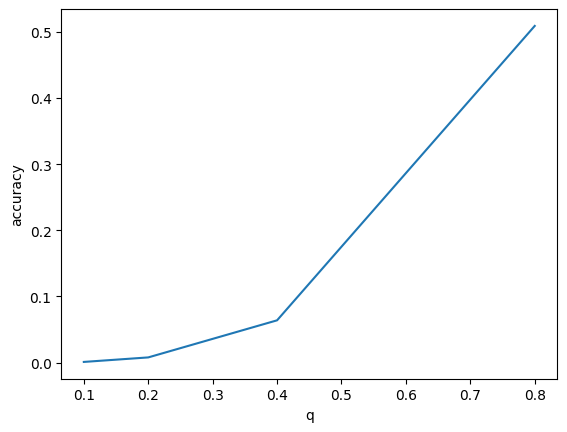

In [25]:
import time

nx_time = []
doulion_time = []
acc = []
for q in [0.1, 0.2, 0.4, 0.8]:
    tot_nx_time = 0
    tot_doulion_time = 0
    tot_acc = 0
    for t in range(10):
        G_test = nx.erdos_renyi_graph(1000, 0.05)

        start = time.time()
        node_triangle_dict = nx.triangles(G_test)
        T = sum([node_triangle_dict[i] for i in node_triangle_dict])/3
        tot_nx_time += (time.time()-start)
        
        start = time.time()
        est_T = doulion(G_test, q)
        tot_doulion_time += (time.time()-start)

        tot_acc += (1 - abs(T-est_T)/T)
    
    nx_time.append(tot_nx_time/10)
    doulion_time.append(tot_doulion_time/10)
    acc.append(tot_acc/10)

plt.plot([0.1, 0.2, 0.4, 0.8], nx_time, label="nx")
plt.plot([0.1, 0.2, 0.4, 0.8], doulion_time, label="doulion")
plt.xlabel("q")
plt.ylabel("time")
plt.legend()
plt.show()

plt.plot([0.1, 0.2, 0.4, 0.8], acc)
plt.xlabel("q")
plt.ylabel("accuracy")
plt.show()




### Problem 4

Repeat the experiment like previous, but use $p=0.1$ for the random graph generation. What do you observe? Can you give an intuitive explaination?

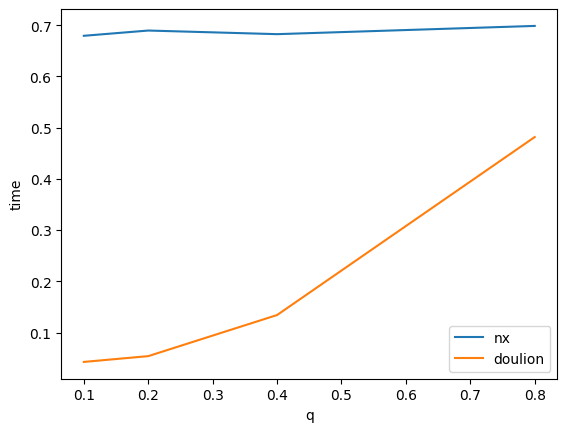

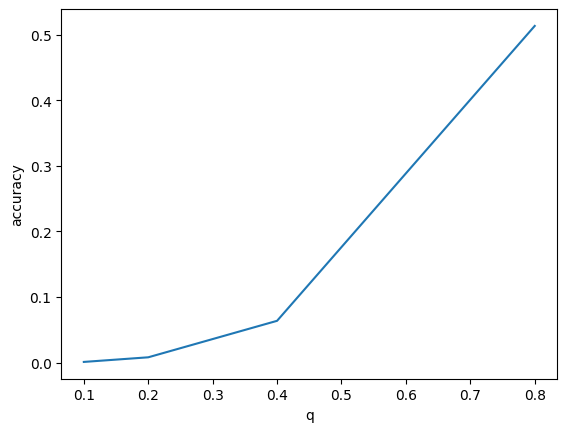

In [26]:
import time

nx_time = []
doulion_time = []
acc = []
for q in [0.1, 0.2, 0.4, 0.8]:
    tot_nx_time = 0
    tot_doulion_time = 0
    tot_acc = 0
    for t in range(10):
        G_test = nx.erdos_renyi_graph(1000, 0.1)

        start = time.time()
        node_triangle_dict = nx.triangles(G_test)
        T = sum([node_triangle_dict[i] for i in node_triangle_dict])/3
        tot_nx_time += (time.time()-start)
        
        start = time.time()
        est_T = doulion(G_test, q)
        tot_doulion_time += (time.time()-start)

        tot_acc += (1 - abs(T-est_T)/T)
    
    nx_time.append(tot_nx_time/10)
    doulion_time.append(tot_doulion_time/10)
    acc.append(tot_acc/10)

plt.plot([0.1, 0.2, 0.4, 0.8], nx_time, label="nx")
plt.plot([0.1, 0.2, 0.4, 0.8], doulion_time, label="doulion")
plt.xlabel("q")
plt.ylabel("time")
plt.legend()
plt.show()

plt.plot([0.1, 0.2, 0.4, 0.8], acc)
plt.xlabel("q")
plt.ylabel("accuracy")
plt.show()




The higher the value of p, the more edges there are in the graph. This means that the number of triangles in the graph will increase. This is because the more edges there are, the more likely it is for a triangle to form. This explains the reason why the running time for both algorithm increases as the value of p increases. However, the accuaracy does not seem to be affected by the value of p. The accuaracy is calculated by the difference between the real number of triangles and the estimated number of triangles, which is affected by the value of q. The value of p does not affect the accuracy. Thus, doulion algorithm ensures the accuracy of the estimated number of triangles with growing number of edges in the graph. \

With the increase of the value of q, the running time of doulion algorithm decreases. This is because the higher the value of q, the more edges are kept in the graph. This means that the size of G' is closer to the size of G.